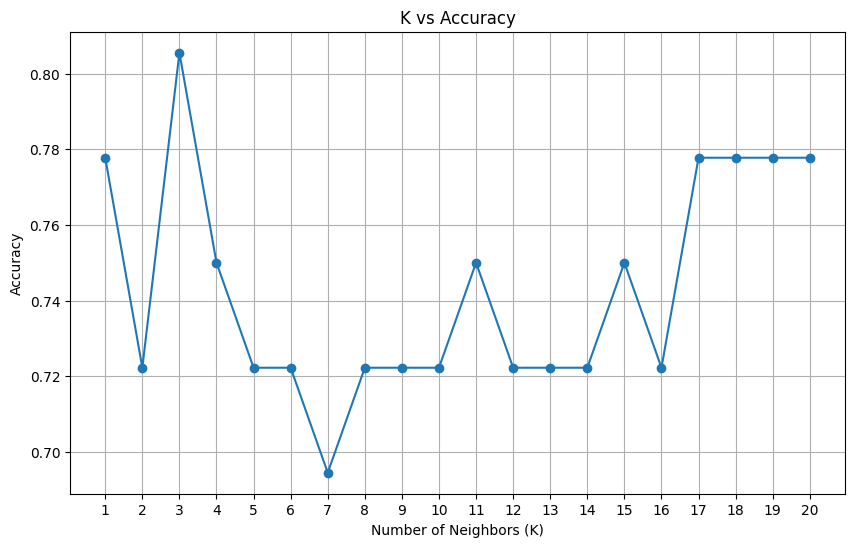

The best value of K is 3 with an accuracy value of 0.806.
Accuracy with best K value: 0.8056
Confusion Matrix is given as:
[[12  0  2]
 [ 1 11  2]
 [ 1  1  6]]


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#a. Load an existing data set
# Here using Wine dataset

from sklearn.datasets import load_wine
wine = load_wine()
A = wine.data
b = wine.target

#b. Split the data set to train and test sets
A_train,A_test,b_train,b_test= train_test_split(A,b, test_size=0.2,random_state=42)

class KNN:
    def __init__(self, k=3):
        self.k= k

    def fit(self,A,b):
        self.A_train= A
        self.b_train= b
        self.classes= np.unique(b)

    def predict(self,A):
        preds= [self._predict(x) for x in A]
        return np.array(preds)

    def _predict(self, x):
        distances= np.linalg.norm(self.A_train-x, axis=1)
        k_indices= np.argsort(distances)[:self.k]
        k_nearest_labels= [self.b_train[i] for i in k_indices]


        k_nearest_labels_indices= np.array([np.where(self.classes == label)[0][0] for label in k_nearest_labels])


        most_common_index= np.bincount(k_nearest_labels_indices).argmax()
        most_c= self.classes[most_common_index]

        return most_c

    def score(self,A_test,b_test):
        preds= self.predict(A_test)
        ACCR= np.mean(preds==b_test)


        cm = confusion_matrix(b_test,preds)

        return ACCR,cm

# c. Find accuracy and confusion Matrix.
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(A_train,b_train)
    accuracy, _ = knn.score(A_test,b_test)
    accuracies.append(accuracy)

# d. Plot the graph
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

max_accuracy_index = np.argmax(accuracies)
best_k = k_values[max_accuracy_index]
best_accuracy = accuracies[max_accuracy_index]

print(f'The best value of K is {best_k} with an accuracy value of {best_accuracy:.3f}.')

# d.Test the model with the best K
knn = KNN(k=best_k)
knn.fit(A_train,b_train)
accuracy, confusion_matrix = knn.score(A_test,b_test)

print(f'Accuracy with best K value: {accuracy:.4f}')
print('Confusion Matrix is given as:')
print(confusion_matrix)